<a href="https://colab.research.google.com/github/Kraykray69/Logistic-Regression-for-Vaccine-Prediction/blob/main/Vaccine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/h1n1_vaccine_prediction.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


<Axes: xlabel='marital_status', ylabel='count'>

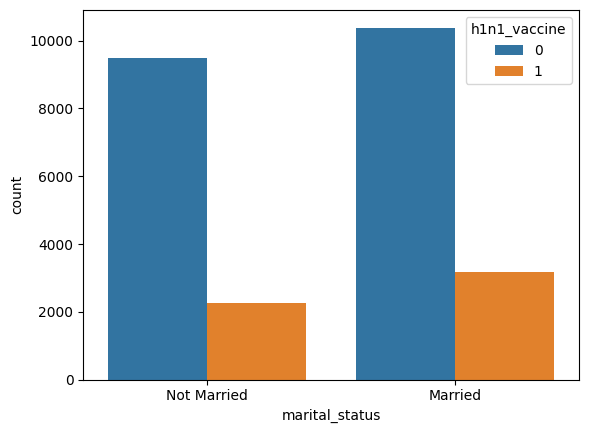

In [ ]:
sns.countplot(data=data,x='marital_status',hue='h1n1_vaccine')

In [ ]:
categorical = data.select_dtypes(include='object').columns.tolist()
categorical

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [ ]:
numerical = data.select_dtypes(include='float64').columns.tolist()
numerical

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']

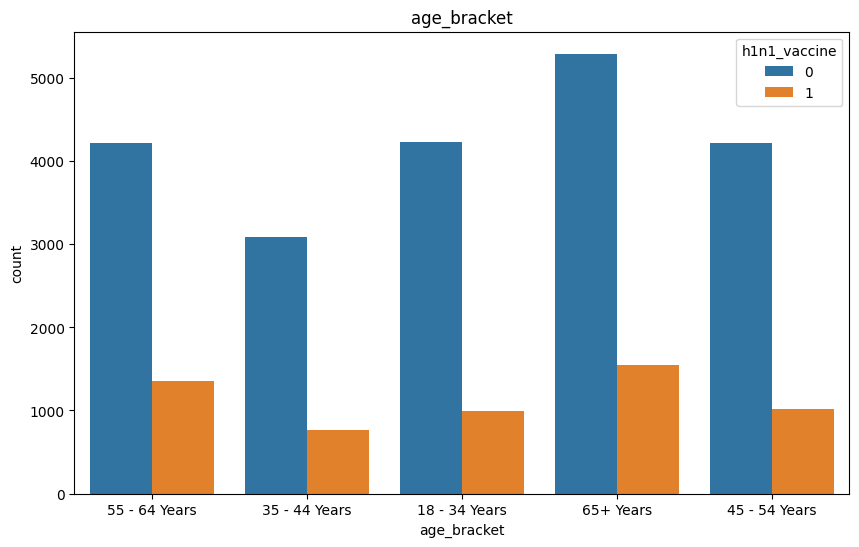

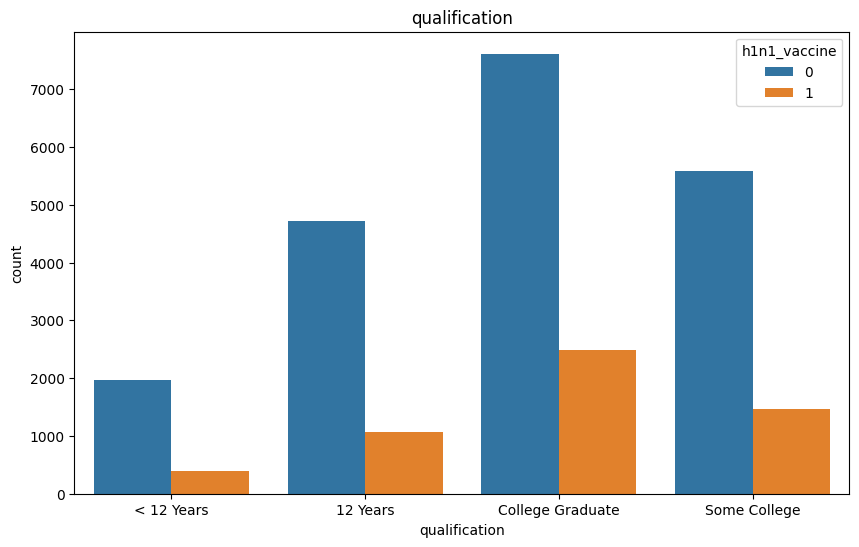

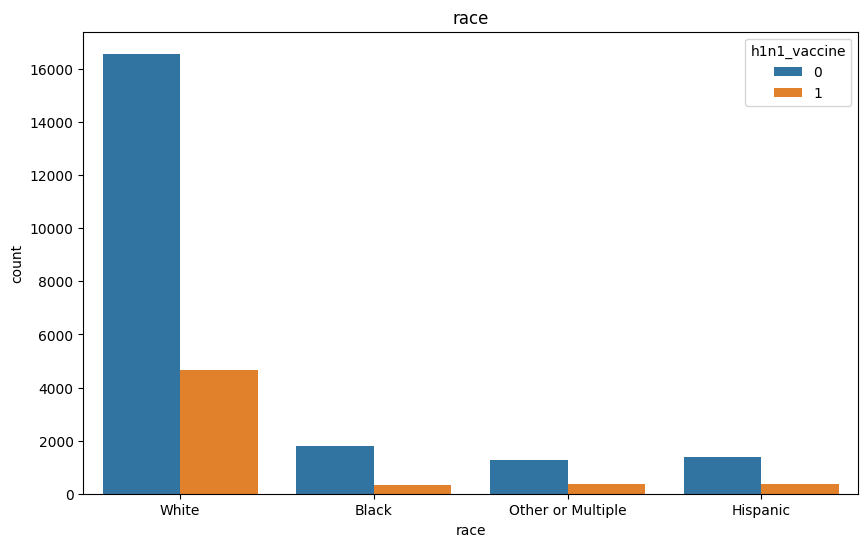

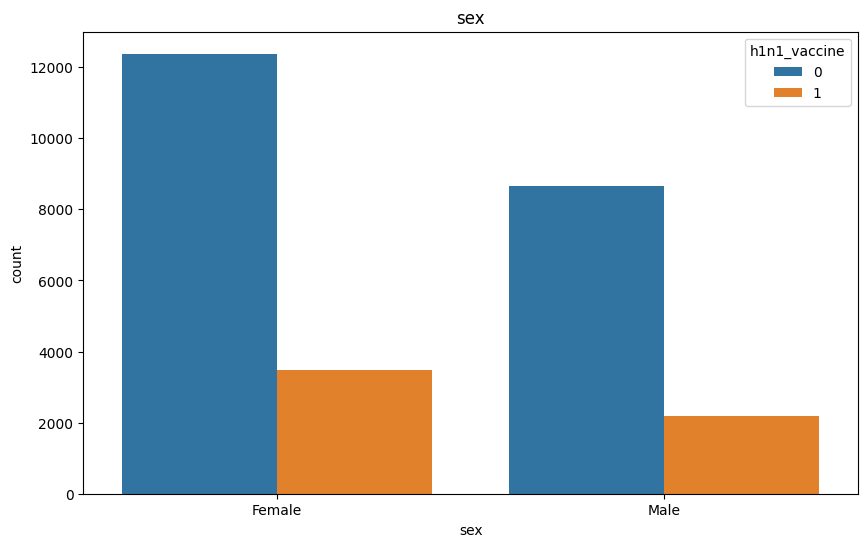

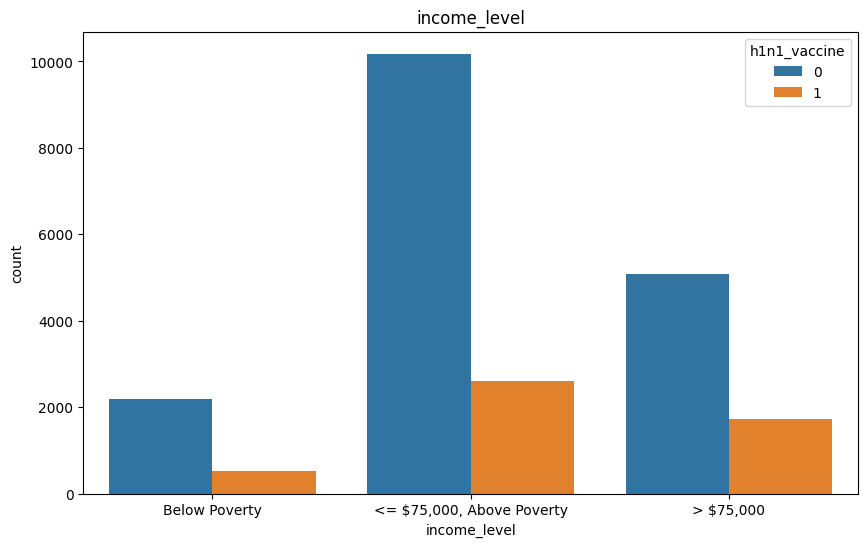

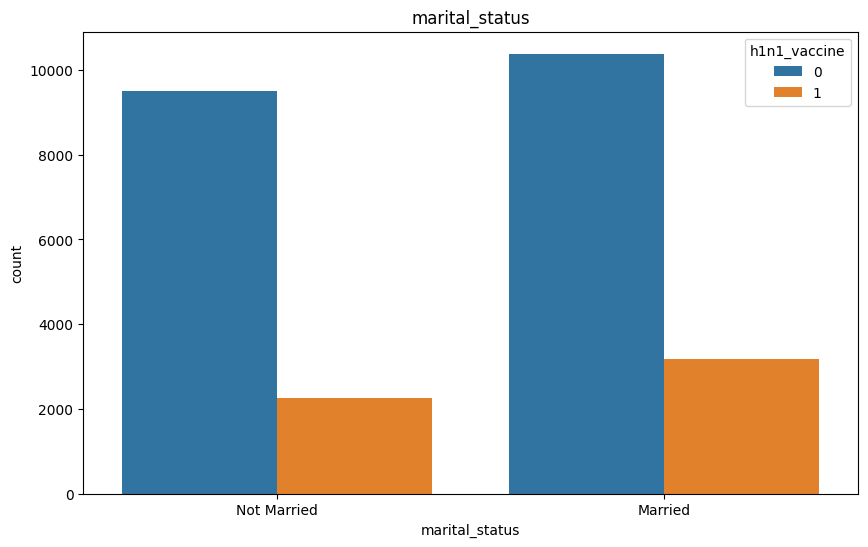

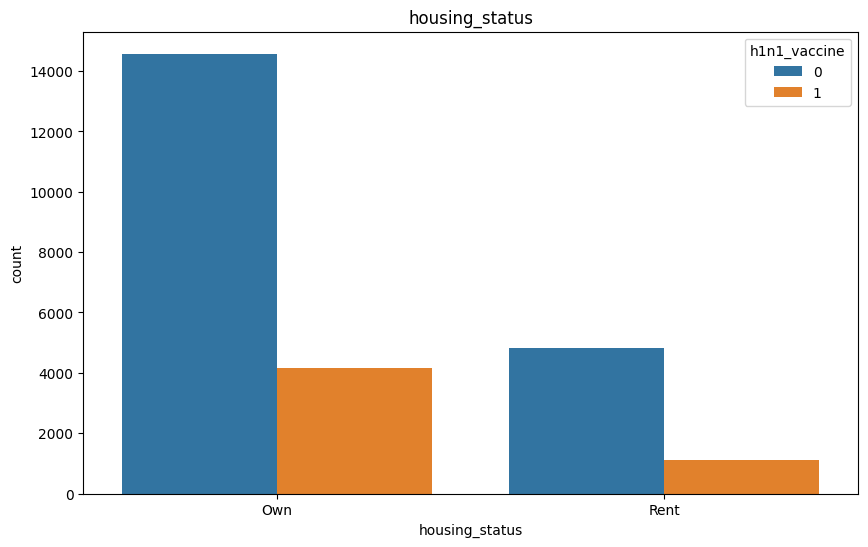

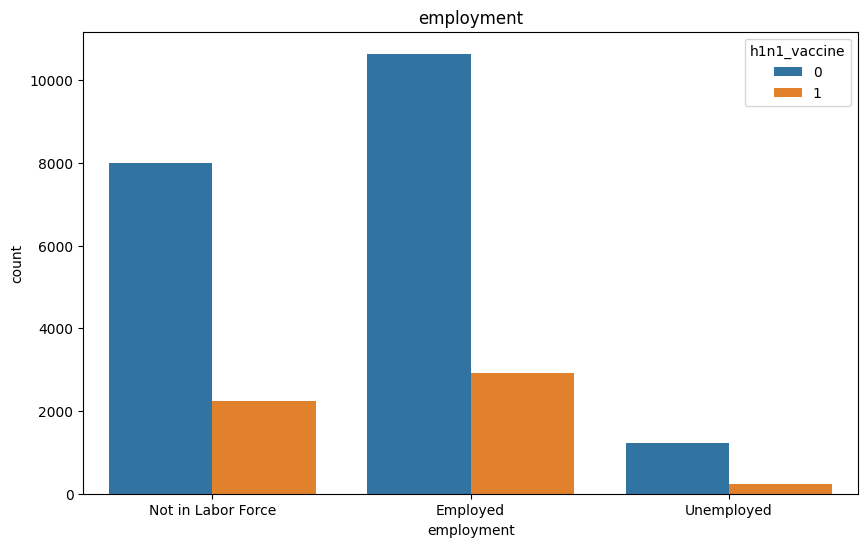

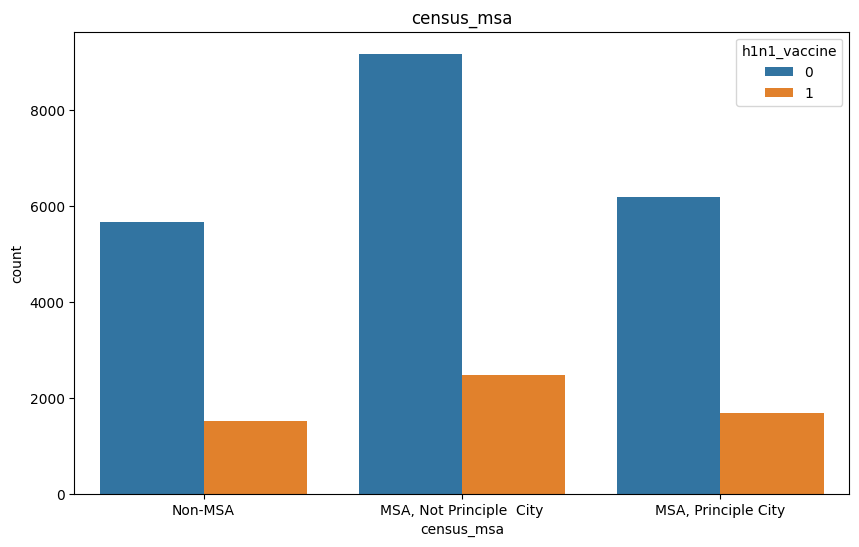

In [ ]:
for i in categorical:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=i, data=data,hue='h1n1_vaccine')
  plt.title(i)


In [ ]:
for i in numerical:
  sns.distplot

In [ ]:
data.skew()

<ipython-input-26-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


unique_id                    0.000000
h1n1_worry                  -0.159913
h1n1_awareness              -0.239224
antiviral_medication         4.186503
contact_avoidance           -1.011306
bought_face_mask             3.401744
wash_hands_frequently       -1.716380
avoid_large_gatherings       0.589522
reduced_outside_home_cont    0.688227
avoid_touch_face            -0.758355
dr_recc_h1n1_vacc            1.349742
dr_recc_seasonal_vacc        0.724397
chronic_medic_condition      0.962097
cont_child_undr_6_mnths      3.033008
is_health_worker             2.462087
has_health_insur            -2.334909
is_h1n1_vacc_effective      -0.902706
is_h1n1_risky                0.672957
sick_from_h1n1_vacc          0.651281
is_seas_vacc_effective      -1.315177
is_seas_risky                0.250923
sick_from_seas_vacc          0.919587
no_of_adults                 0.786572
no_of_children               1.543903
h1n1_vaccine                 1.406022
dtype: float64

<ipython-input-29-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

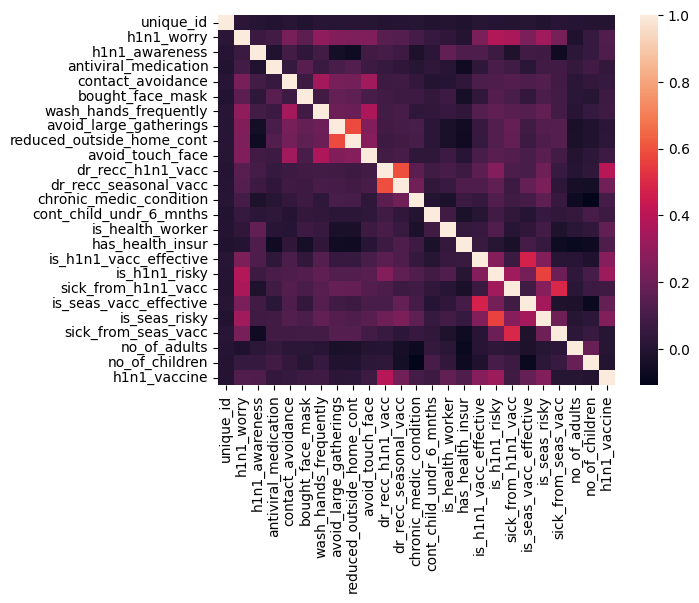

In [ ]:
sns.heatmap(data.corr())

In [ ]:
def chi2_sq_test(var1,var2):
  contingency_table = pd.crosstab(var1,var2)
  _,pvalue,_,_ = chi2_contingency(contingency_table)
  if pvalue < 0.05:
    print("Accept the alternate hypothesis",round(pvalue,2))
  else:
    print("Do not accept the alternate hypothesis",round(pvalue,2))
  return contingency_table

*   Null Hypothesis : Gender and Loan Status are Independent
*   Alternate Hypothesis : Gender and Loan Status are Dependent

In [ ]:
for i in categorical:
  print(i,'and','h1n1_vaccine')
  chi2_sq_test(data[i],data['h1n1_vaccine'])

age_bracket and h1n1_vaccine
Accept the alternate hypothesis 0.0
qualification and h1n1_vaccine
Accept the alternate hypothesis 0.0
race and h1n1_vaccine
Accept the alternate hypothesis 0.0
sex and h1n1_vaccine
Accept the alternate hypothesis 0.0
income_level and h1n1_vaccine
Accept the alternate hypothesis 0.0
marital_status and h1n1_vaccine
Accept the alternate hypothesis 0.0
housing_status and h1n1_vaccine
Accept the alternate hypothesis 0.0
employment and h1n1_vaccine
Accept the alternate hypothesis 0.0
census_msa and h1n1_vaccine
Do not accept the alternate hypothesis 0.94


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
for i in data.columns:
  data[i] = np.where(data[i].isna(),data[i].mode(dropna=True)[0],data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [ ]:
le = LabelEncoder()

In [ ]:
data['sex'] = le.fit_transform(data['sex'])
data['income_level'] = le.fit_transform(data['income_level'])
data['marital_status'] = le.fit_transform(data['marital_status'])
data['housing_status'] = le.fit_transform(data['housing_status'])
data['employment'] = le.fit_transform(data['employment'])

In [ ]:
data = pd.get_dummies(data, columns=['race','age_bracket','qualification','census_msa'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   unique_id                            26707 non-null  int64  
 1   h1n1_worry                           26707 non-null  float64
 2   h1n1_awareness                       26707 non-null  float64
 3   antiviral_medication                 26707 non-null  float64
 4   contact_avoidance                    26707 non-null  float64
 5   bought_face_mask                     26707 non-null  float64
 6   wash_hands_frequently                26707 non-null  float64
 7   avoid_large_gatherings               26707 non-null  float64
 8   reduced_outside_home_cont            26707 non-null  float64
 9   avoid_touch_face                     26707 non-null  float64
 10  dr_recc_h1n1_vacc                    26707 non-null  float64
 11  dr_recc_seasonal_vacc       

In [ ]:
x=data.drop(['unique_id','h1n1_vaccine'],axis=1)
y=data['h1n1_vaccine']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21365, 44)
(5342, 44)
(21365,)
(5342,)


In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [ ]:
#Confusion matrix
conf_matrix_train=confusion_matrix(y_train,y_hat_train)
print(conf_matrix_train)

[[15987   873]
 [ 2612  1893]]


In [ ]:
conf_matrix_test = confusion_matrix(y_test,y_hat_test)
print(conf_matrix_test)

[[3942  231]
 [ 677  492]]


In [ ]:
print("Accuracy score for the train data is",accuracy_score(y_train,y_hat_train))

Accuracy score for the train data is 0.8368827521647555


In [ ]:
print("Accuracy score for the test data is",accuracy_score(y_test,y_hat_test))

Accuracy score for the test data is 0.830026207412954
